In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier      # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics                          #Import scikit-learn metrics module for accuracy calculation

In [62]:
df = pd.read_csv('messidor_features1.csv') #data converted to csv and imported.
df.rename(columns={'0':'Quality','1':'Pre-Screen','2':'MA1','3':'MA2','4':'MA3','5':'MA4','6':'MA5','7':'MA6' 
,'8':'MA7','9':'MA8','10':'MA9','11':'MA10','12':'MA11','13':'MA12','14':'MA13','15':'MA14','16':'MaculaDist','17':'OpticDiscDiam','18':'AM/FM','19':'Output',}, inplace=True)

df = df.drop(columns=['MA12', 'MA13','MA14'])

#Normalize each feature to the range of [0,1]
df=(df-df.min())/(df.max()-df.min())
#print(df)

input_feature_cols = ['Quality','Pre-Screen','MA1','MA2','MA3','MA4','MA5','MA6','MA7','MA8','MA9','MA10','MA11','MaculaDist','OpticDiscDiam','AM/FM']
inputs = df[input_feature_cols]

output_feature_cols = ['Output']
outputs = df[output_feature_cols]  

In [63]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, train_size=0.8, random_state=0)

In [64]:
#hyperparameters and training rules/algorithms 

In [65]:
# train a logistic regression model on the training set
# instantiate model
logreg = LogisticRegression()
# fit model
logreg.fit(X_train, y_train)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [66]:
#x_test_view = df_X_test.values.squeeze()
#y_prob = logreg.predict_proba(X_test)
#sns.scatterplot(x = x_test_view, y = y_prob[:,1], hue = y_test)
# make class predictions for the testing set
#y_pred_class = logreg.predict(X_test)
#f_X_test = pd.DataFrame(X_test)

y_pred_class = logreg.predict(X_test)    #Predicted answers 

In [67]:
# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

0.670995670995671


In [68]:
 print(metrics.confusion_matrix(y_test, y_pred_class))
    
confusion_matrix = (metrics.confusion_matrix(y_test, y_pred_class))

[[72 29]
 [47 83]]


<AxesSubplot:>

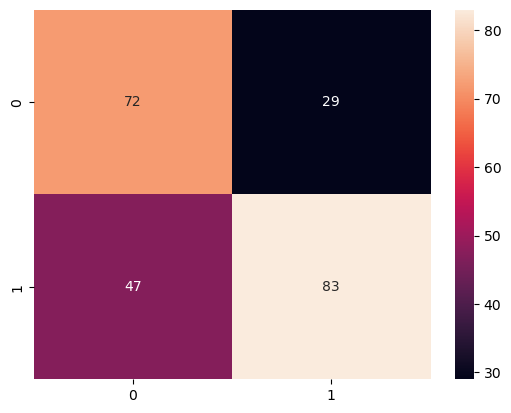

In [69]:
sns.heatmap(confusion_matrix, annot=True)

In [70]:
print('True', y_test.values[0:25])
print('Pred', y_pred_class[0:25])

True [[1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]]
Pred [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1.]


In [71]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[72 29]
 [47 83]]


In [72]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.670995670995671
0.670995670995671


In [73]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.329004329004329
0.32900432900432897


In [74]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.6384615384615384
0.6384615384615384


In [75]:
specificity = TN / (TN + FP)
print(specificity)

0.7128712871287128


In [76]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.2871287128712871
0.28712871287128716


In [77]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.7410714285714286
0.7410714285714286


In [78]:
from sklearn.metrics import f1_score
F1_score = 2*((precision*sensitivity)/(precision+sensitivity))
print(F1_score)
print(metrics.f1_score(y_test, y_pred_class))

0.6859504132231404
0.6859504132231404


In [79]:
auc = metrics.roc_auc_score(y_test, y_pred_class)
print('AUC:' + str(auc))

AUC:0.6756664127951255


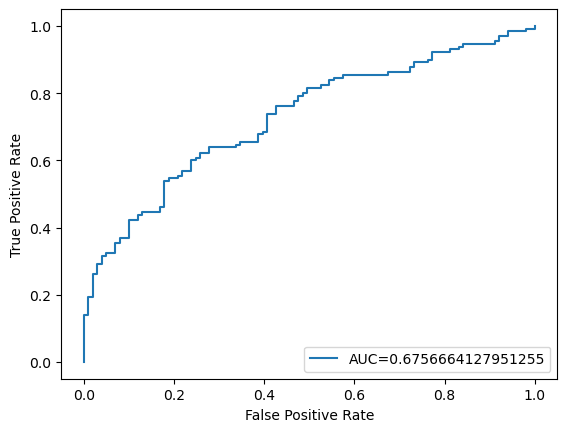

In [80]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Tuning the model - Algorithms

In [81]:
#Tune the parameters or training rules/algorithms of your neural network model and 
#re-train your model so that testing performance of the model is improved.

# instantiate model
logreg2 = LogisticRegression(class_weight='balanced', solver='saga')
# fit model
logreg2.fit(X_train, y_train)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', solver='saga')

In [82]:
y_pred_class2 = logreg2.predict(X_test)    #Predicted answers 

In [83]:
# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_class2))

0.658008658008658


<AxesSubplot:>

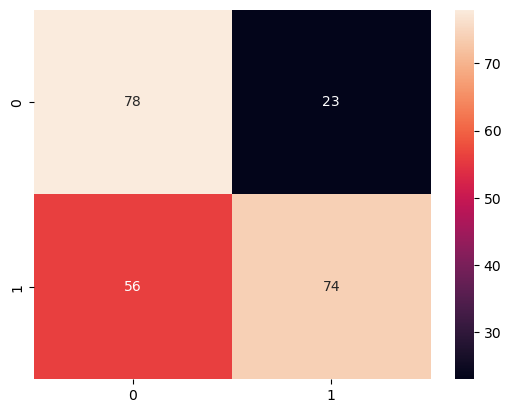

In [84]:
confusion_matrix = (metrics.confusion_matrix(y_test, y_pred_class2))
sns.heatmap(confusion_matrix, annot=True)

In [85]:
confusion = metrics.confusion_matrix(y_test, y_pred_class2)
print(confusion)
#[row, column]
#TP = 184
#TN = 215
#FP = 59
#FN = 118

[[78 23]
 [56 74]]


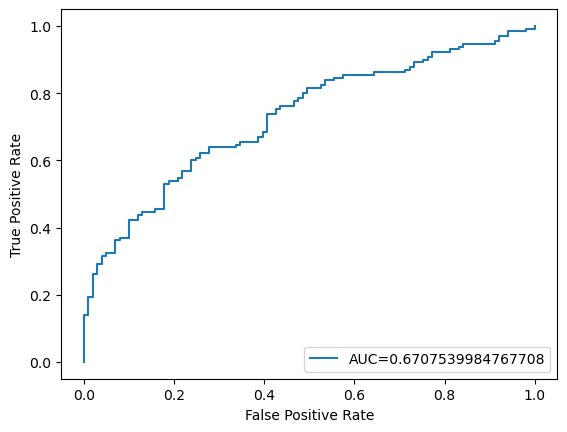

In [86]:
auc = metrics.roc_auc_score(y_test, y_pred_class2)
y_pred_proba = logreg2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Tuning the model - Hyperparameters

In [104]:
input_feature_cols = ['MA1','MA2','MA3','MA4','MA5','MA6','MA7','MA8','MA9','MA10','MA11','MaculaDist','OpticDiscDiam']
inputs = df[input_feature_cols]         #removing some more features

output_feature_cols = ['Output']
outputs = df[output_feature_cols] 

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, train_size=0.9, random_state=0)

logreg3 = LogisticRegression() #back to defaults
logreg3.fit(X_train, y_train)
y_pred_class3 = logreg3.predict(X_test)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_class3))

0.6896551724137931


<AxesSubplot:>

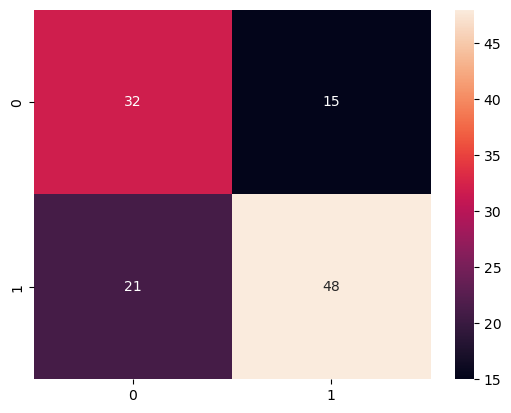

In [109]:
confusion_matrix = (metrics.confusion_matrix(y_test, y_pred_class3))
sns.heatmap(confusion_matrix, annot=True)

In [110]:
confusion = metrics.confusion_matrix(y_test, y_pred_class3)
print(confusion)
#[row, column]
#TP = 210
#TN = 169
#FP = 105
#FN = 92

[[32 15]
 [21 48]]


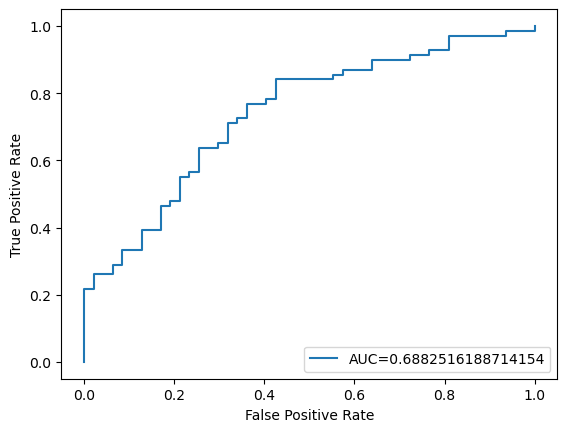

In [111]:
auc = metrics.roc_auc_score(y_test, y_pred_class3)
y_pred_proba = logreg3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Decision tree classifier 


In [118]:
1#Explore the selected machine learning library and construct a new machine learning model 
#using different neural network or classifier architecture,
#like support vector machines, decision tree or random forest. 
#Train and test the new model using the same datasets.
#Compare the performance of the models you built in Step (2.5, Task-1) and this step.
np.set_printoptions(suppress=True)

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, train_size=0.8, random_state=0)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.5844155844155844


In [116]:
clf.score(X_test, y_test) # Alternate accuracy measure

0.5930735930735931

<AxesSubplot:>

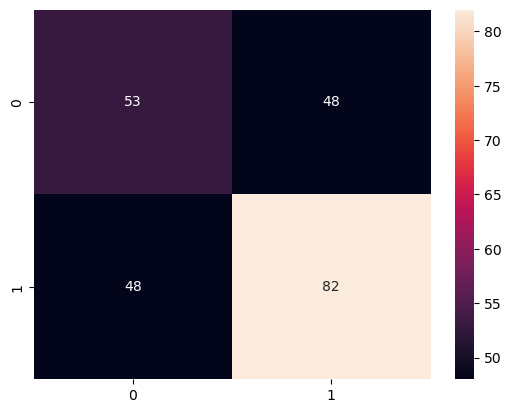

In [119]:
confusion_matrix = (metrics.confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix, annot=True)